In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [7]:
scientistData = pd.read_csv('Top_scientists_2023.csv')
scientistData.head()
scientistData.shape

(217097, 47)

In [8]:
#Cutting to top 100k 
sci100k_Data = scientistData[:-117097]
sci100k_Data.head(20)

,authfull,inst_name,cntry,np6023,firstyr,lastyr,rank (ns),nc9623 (ns),h23 (ns),hm23 (ns),...,nc9623_rw,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
0,"Graetzel, Michael",École Polytechnique Fédérale de Lausanne,che,1760,1971,2024,1,365234,270,117.269725,...,125,Nanoscience & Nanotechnology,0.200796,Chemical Physics,0.123436,Enabling & Strategic Technologies,0.410694,2,1,135958
1,"Wang, Zhong Lin",Chinese Academy of Sciences,chn,2644,1986,2025,2,279327,250,129.899914,...,162,Nanoscience & Nanotechnology,0.576952,Materials,0.101971,Enabling & Strategic Technologies,0.739955,1,2,135958
2,"Willett, Walter C.",Harvard T.H. Chan School of Public Health,usa,2416,1970,2024,3,346654,306,122.561857,...,174,Epidemiology,0.189627,Nutrition & Dietetics,0.164315,Clinical Medicine,0.529461,1,1,9875
3,"Kresse, Georg",Universität Wien,aut,388,1992,2024,4,297085,109,49.890597,...,34,Applied Physics,0.420103,Chemical Physics,0.252577,Physics & Astronomy,0.884021,1,1,304738
4,"Kessler, Ronald C.",Harvard Medical School,usa,1098,1975,2024,5,267255,237,86.248917,...,69,Psychiatry,0.595628,Public Health,0.053734,Clinical Medicine,0.776867,1,1,80339
5,"Friston, Karl",University College London,gbr,1270,1989,2024,6,188600,200,106.582984,...,45,Neurology & Neurosurgery,0.513428,Experimental Psychology,0.113744,Clinical Medicine,0.672986,1,1,341636
6,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1043,1972,2024,7,566794,254,106.984801,...,318,General & Internal Medicine,0.361804,Oncology & Carcinogenesis,0.049904,Clinical Medicine,0.844530,1,1,333256
7,"McEwen, Bruce S.",Rockefeller University,usa,1205,1959,2023,8,153846,190,111.878948,...,45,Neurology & Neurosurgery,0.482008,Endocrinology & Metabolism,0.155649,Clinical Medicine,0.879498,2,2,341636
8,"Whitesides, George M.",Harvard Faculty of Arts and Sciences,usa,1389,1962,2023,9,244615,223,113.458896,...,68,General Chemistry,0.209689,Organic Chemistry,0.128706,Chemistry,0.509761,1,1,53171
9,"Witten, Edward",Institute for Advanced Study,usa,319,1970,2024,10,101514,137,108.916667,...,20,Nuclear & Particle Physics,0.677316,Mathematical Physics,0.105431,Physics & Astronomy,0.894569,1,1,151105


In [9]:
sci100k_Data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6023', 'firstyr', 'lastyr',
       'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)',
       'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6023 cited9623',
       'np6023_rw', 'nc9623_to_rw', 'nc9623_rw', 'sm-subfield-1',
       'sm-subfield-1-frac', 'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac', 'rank sm-subfield-1', 'rank sm-subfield-1 (ns)',
       'sm-subfield-1 count'],
      dtype='object')

In [26]:
#restrict to "self-citations excluded" dataset
sci100k = sci100k_Data.drop(['authfull', 'inst_name', 'cntry', 'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)', 'sm-subfield-1 count'], axis =1)

In [27]:
sci100k.shape

(100000, 29)

In [28]:
sci100k.columns

Index(['np6023', 'firstyr', 'lastyr', 'self%', 'rank', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1', 'sm-subfield-1-frac', 'sm-subfield-2',
       'sm-subfield-2-frac', 'sm-field', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)'],
      dtype='object')

In [29]:
##add in a feature actyr to reflect active years of research
sci100k['actyr'] = sci100k['lastyr'] - sci100k['firstyr']

##add in features npf (number of first authored papers) and ncf (total cites to first authored papers). 
#this is to create more features for us to analyse their correlation to rank
sci100k['npf'] = sci100k['cpsf'] - sci100k['nps']
sci100k['ncf'] = sci100k['ncsf'] - sci100k['ncs']

In [30]:
sci100k.head()

,np6023,firstyr,lastyr,self%,rank,nc9623,h23,hm23,nps,ncs,...,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),actyr,npf,ncf
0,1760,1971,2024,0.0692,2,392395,281,120.981965,59,30508,...,0.200796,Chemical Physics,0.123436,Enabling & Strategic Technologies,0.410694,2,1,53,24,1772
1,2644,1986,2025,0.1475,1,327659,275,140.601151,115,22775,...,0.576952,Materials,0.101971,Enabling & Strategic Technologies,0.739955,1,2,39,137,18234
2,2416,1970,2024,0.0917,3,381657,320,127.503846,123,12742,...,0.189627,Nutrition & Dietetics,0.164315,Clinical Medicine,0.529461,1,1,54,115,25175
3,388,1992,2024,0.0203,4,303251,117,51.704883,6,60117,...,0.420103,Chemical Physics,0.252577,Physics & Astronomy,0.884021,1,1,32,25,200568
4,1098,1975,2024,0.0613,6,284705,249,89.943757,39,7088,...,0.595628,Public Health,0.053734,Clinical Medicine,0.776867,1,1,49,197,124147


In [31]:
sci100k["sm-field"].value_counts()

sm-field
Clinical Medicine                           37083
Biomedical Research                         11477
Physics & Astronomy                          9596
Chemistry                                    5321
Biology                                      5011
Earth & Environmental Sciences               4795
Enabling & Strategic Technologies            4202
Engineering                                  4111
Information & Communication Technologies     3805
Psychology & Cognitive Sciences              3405
Economics & Business                         3040
Social Sciences                              2354
Agriculture, Fisheries & Forestry            1758
Public Health & Health Services              1726
Mathematics & Statistics                     1223
Built Environment & Design                    378
Communication & Textual Studies               365
Historical Studies                            224
Philosophy & Theology                         126
Name: count, dtype: int64

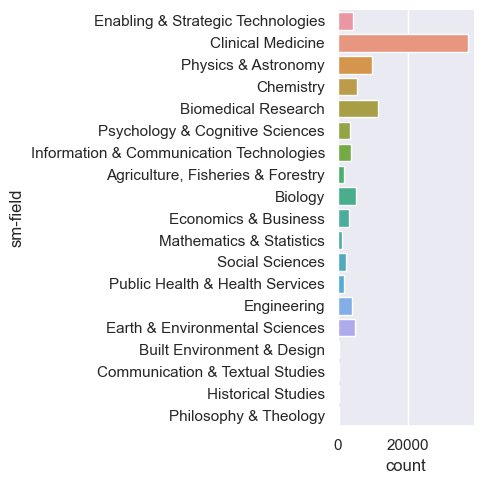

In [32]:
sb.catplot(y = "sm-field", data = sci100k, kind = "count")

In [34]:
sci100k_2=sci100k.drop(['firstyr','lastyr'],axis=1)

In [35]:
sci100k_2.head()

,np6023,self%,rank,nc9623,h23,hm23,nps,ncs,cpsf,ncsf,...,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),actyr,npf,ncf
0,1760,0.0692,2,392395,281,120.981965,59,30508,83,32280,...,0.200796,Chemical Physics,0.123436,Enabling & Strategic Technologies,0.410694,2,1,53,24,1772
1,2644,0.1475,1,327659,275,140.601151,115,22775,252,41009,...,0.576952,Materials,0.101971,Enabling & Strategic Technologies,0.739955,1,2,39,137,18234
2,2416,0.0917,3,381657,320,127.503846,123,12742,238,37917,...,0.189627,Nutrition & Dietetics,0.164315,Clinical Medicine,0.529461,1,1,54,115,25175
3,388,0.0203,4,303251,117,51.704883,6,60117,31,260685,...,0.420103,Chemical Physics,0.252577,Physics & Astronomy,0.884021,1,1,32,25,200568
4,1098,0.0613,6,284705,249,89.943757,39,7088,236,131235,...,0.595628,Public Health,0.053734,Clinical Medicine,0.776867,1,1,49,197,124147


In [36]:
sci100k_2.columns

Index(['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1', 'sm-subfield-1-frac', 'sm-subfield-2',
       'sm-subfield-2-frac', 'sm-field', 'sm-field-frac', 'rank sm-subfield-1',
       'rank sm-subfield-1 (ns)', 'actyr', 'npf', 'ncf'],
      dtype='object')

In [37]:
#sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [39]:
first7 = pd.DataFrame(sci100k_2[['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs']])

<Axes: >

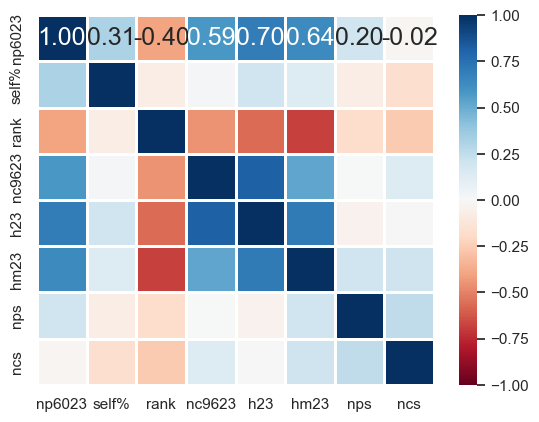

In [41]:
sb.heatmap(first7.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")